In [30]:
!pip install  gensim
!pip install   NLTK
!pip install   corpus

import nltk
nltk.download('punkt')
nltk.download('all')
!pip install --upgrade nltk
from gensim.corpora.dictionary import Dictionary

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /r

In [0]:
import csv
import numpy as np
import pandas as pd
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from  nltk.tokenize import TweetTokenizer
import nltk
from nltk.tokenize  import regexp_tokenize 
from nltk.tokenize  import word_tokenize
from nltk.corpus  import stopwords
from gensim.corpora.dictionary import Dictionary
from nltk.stem import SnowballStemmer
import string
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
from collections import Counter


In [32]:
#concatenating dataframes 
df1 = pd.read_csv('Youtube01-Psy.csv')
df2 = pd.read_csv('Youtube02-KatyPerry.csv')
df3 = pd.read_csv('Youtube03-LMFAO.csv')
df4 = pd.read_csv('Youtube04-Eminem.csv')
df5 = pd.read_csv('Youtube05-Shakira.csv')
frames = [df1, df2, df3, df4, df5]
df = pd.concat(frames)
df = df.append(frames)
df = df.reset_index(drop=True)
df.head()


,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [5]:
df['CONTENT'][0]



'Huh, anyway check out this you[tube] channel: kobyoshi02'

# Preprocessing

In [34]:
#removing stop words, puting everything in lower case

snowball_stemmer = SnowballStemmer('english')


tokenlist = []
row_list = []
processed = pd.Series()
for index, row in df.iterrows():
  
 
  for token in nltk.word_tokenize(row['CONTENT']):
    if token not in stopwords.words('english'):
      if token not in [':', '']:
        token = token.lower()
        token = nltk.stem.WordNetLemmatizer().lemmatize(token.lower(), 'v')
        tokenlist.append(token)
  
  
  
  untoken=' '.join( tokenlist)
  processed = processed.set_value(index, untoken)
  tokenlist = []
  
processed

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


0          huh , anyway check [ tube ] channel kobyoshi02
1       hey guy check new channel first vid this be us...
2                                   test i say murdev.com
3                      shake sexy ass channel enjoy ^_^ ﻿
4                          watch ? v=vtarggvgtwq check .﻿
5       hey , check new website ! ! this site kid stuf...
6                                     subscribe channel ﻿
7               turn mute soon come want check view ... ﻿
8                    you check channel funny videos ! ! ﻿
9                u should.d check channel tell i next ! ﻿
10                                      hey subscribe me﻿
11      once start read stop . if subscribe within one...
12                   https //twitter.com/gbphotographygb﻿
13                                subscribe like comment﻿
14      please like d https //premium.easypromosapp.co...
15      hello ! do like game , art videos , scientific...
16                                      i 'm check views﻿
17      http /

In [35]:
# adding preprocessedback to the frame
df = pd.concat([df, processed.rename('PREPROCESSED')], axis=1)
df

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,PREPROCESSED
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1,"huh , anyway check [ tube ] channel kobyoshi02"
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1,hey guy check new channel first vid this be us...
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1,test i say murdev.com
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,shake sexy ass channel enjoy ^_^ ﻿
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1,watch ? v=vtarggvgtwq check .﻿
5,LZQPQhLyRh9-wNRtlZDM90f1k0BrdVdJyN_YsaSwfxc,Jason Haddad,2013-11-26T02:55:11,"Hey, check out my new website!! This site is a...",1,"hey , check new website ! ! this site kid stuf..."
6,z13lfzdo5vmdi1cm123te5uz2mqig1brz04,ferleck ferles,2013-11-27T21:39:24,Subscribe to my channel ﻿,1,subscribe channel ﻿
7,z122wfnzgt30fhubn04cdn3xfx2mxzngsl40k,Bob Kanowski,2013-11-28T12:33:27,i turned it on mute as soon is i came on i jus...,0,turn mute soon come want check view ... ﻿
8,z13ttt1jcraqexk2o234ghbgzxymz1zzi04,Cony,2013-11-28T16:01:47,You should check my channel for Funny VIDEOS!!﻿,1,you check channel funny videos ! ! ﻿
9,z12avveb4xqiirsix04chxviiljryduwxg0,BeBe Burkey,2013-11-28T16:30:13,and u should.d check my channel and tell me wh...,1,u should.d check channel tell i next ! ﻿


In [10]:
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] pe08................ Cross-Framework and Cross-Domain Parser
                           Evaluation Shared Task

Collections:

([*] marks installed packages)

Download which package (l=list; x=cancel)?
  Identifier> pe08
      Unzipping corpora/pe08.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

# Dividing data into train and test sets

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

y = df['CLASS']


In [0]:
X_train, X_test, y_train, y_test = train_test_split(processed, y, test_size = 0.33, random_state = 53)

# Score, Confusion Matrics, Classification Report

In [43]:


# Create a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(tfidf_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print('Accuracy score\n', score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, labels=[1, 0])
print('\nConfusion Matrix\n', cm)


knn = KNeighborsClassifier(n_neighbors=6)

#y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
#print(confusion_matrix(y_test, pred))
print('\nClassification report:\n ', classification_report(y_test, pred))


Accuracy score
 0.9395817195972115

Confusion Matrix
 [[627  32]
 [ 46 586]]

Classification report:
                precision    recall  f1-score   support

           0       0.95      0.93      0.94       632
           1       0.93      0.95      0.94       659

   micro avg       0.94      0.94      0.94      1291
   macro avg       0.94      0.94      0.94      1291
weighted avg       0.94      0.94      0.94      1291



Confusion matrix: 1 - spam, 0 -  non spam


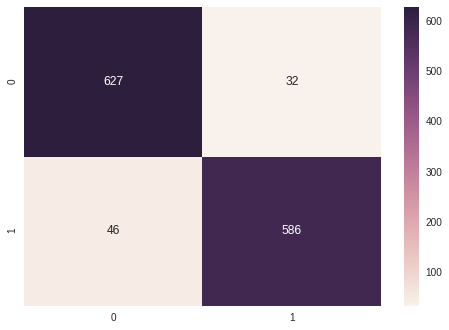

In [48]:
#confusion Matrix Visualised 
uniform_data = np.random.rand(10, 12)
print ('Confusion matrix: 1 - spam, 0 -  non spam')
ax = sns.heatmap(cm, annot=True, fmt="d")


#Common Words for spam and notspam

In [49]:


article = processed[df['CLASS']== 1]
article = article.tolist()

article_0 = processed[df['CLASS']== 0]
article_0 = article_0.tolist()

article=' '.join( article)
print(article)
article_0=' '.join( article_0)
print(article_0)




from nltk.tokenize import TweetTokenizer


def common_words(article):
  tknzr = TweetTokenizer()
  article = tknzr.tokenize(article)

  # Retain alphabetic words: alpha_only
  alpha_only = [t for t in article if t.isalpha()]
  # Remove all stop words: no_stops
  no_stops = [t for t in alpha_only if t not in stopwords.words("english")]
  # Instantiate the WordNetLemmatizer
  wordnet_lemmatizer = WordNetLemmatizer()
  # Lemmatize all tokens into a new list: lemmatized
  lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]
  # Create the bag-of-words: bow
  bow = Counter(lemmatized)
  # Print the 100 most common tokens
  return (dict(bow.most_common(20)))



def dict_article(article):
  tknzr = TweetTokenizer()
  article = tknzr.tokenize(article)

  # Retain alphabetic words: alpha_only
  alpha_only = [t for t in article if t.isalpha()]
  # Remove all stop words: no_stops
  no_stops = [t for t in alpha_only if t not in stopwords.words("english")]
  # Instantiate the WordNetLemmatizer
  wordnet_lemmatizer = WordNetLemmatizer()
  # Lemmatize all tokens into a new list: lemmatized
  lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]
  # Create the bag-of-words: bow
  bow = Counter(lemmatized)
  
  return (dict(bow))




print( common_words(article))
print(common_words(article_0))
  


  



huh , anyway check [ tube ] channel kobyoshi02 hey guy check new channel first vid this be us the monkey ! ! ! i 'm monkey white shirt , please leave like comment please subscribe ! ! ! ! test i say murdev.com shake sexy ass channel enjoy ^_^ ﻿ watch ? v=vtarggvgtwq check .﻿ hey , check new website ! ! this site kid stuff . kidsmediausa . com subscribe channel ﻿ you check channel funny videos ! ! ﻿ u should.d check channel tell i next ! ﻿ hey subscribe me﻿ once start read stop . if subscribe within one day 're entire family die want stay alive subscribe right now.﻿ https //twitter.com/gbphotographygb﻿ subscribe like comment﻿ please like d https //premium.easypromosapp.com/voteme/19924/616375350﻿ hello ! do like game , art videos , scientific experiment , tutorials , lyric videos , much , much ? if please check channel subscribe , 've start , soon hope able cover expectations ... you also check 've get far ! ﻿ http //www.ebay.com/itm/171183229277 ? sspagename=strk meselx it & amp ; _trk

# Probability of a word being an inducator of  spam
Number of occurences in spam content/ number of occurences 


In [24]:
#creat dictionary of all spam words with probability of them being an inductor of a spam 

spam  =common_words(article)

notspam  =dict_article(article_0)

dict_prob = {}


for (w,v) in spam.items():
  if w not in notspam:
    dict_prob[w] = spam[w]/(spam[w])
  else:
    dict_prob[w] = spam[w]/(spam[w]+notspam[w])

    
data = np.array([['','word','prob','smap','nonsmap']
                ])
                
print(pd.DataFrame(data=data[1:,1:],
                  index=data[1:,0],
                  columns=data[0,1:]))

df_list = []
for k in  sorted(common_words(article).keys()):
  df_list.append([k, dict_prob[k], spam[k], notspam[k]] )
 
  print(k, dict_prob[k])
  
print(df_list)

df_spam = pd.DataFrame(df_list,columns=['word','prob','spam','nonsmap'],dtype=float)
print (df_spam)

Empty DataFrame
Columns: [word, prob, smap, nonsmap]
Index: []
amp 0.9558823529411765
br 0.7509727626459144
channel 0.99
check 0.9672413793103448
comment 0.8301886792452831
get 0.7192982456140351
guy 0.8776978417266187
http 0.9488188976377953
like 0.6273062730627307
make 0.8024691358024691
money 0.9662921348314607
music 0.7515923566878981
new 0.9754098360655737
please 0.9879032258064516
song 0.26843657817109146
subscribe 0.9957983193277311
thank 0.9615384615384616
u 0.8728813559322034
video 0.7716535433070866
youtube 0.9102040816326531
[['amp', 0.9558823529411765, 260, 12], ['br', 0.7509727626459144, 386, 128], ['channel', 0.99, 396, 4], ['check', 0.9672413793103448, 1122, 38], ['comment', 0.8301886792452831, 176, 36], ['get', 0.7192982456140351, 246, 96], ['guy', 0.8776978417266187, 244, 34], ['http', 0.9488188976377953, 482, 26], ['like', 0.6273062730627307, 340, 202], ['make', 0.8024691358024691, 260, 64], ['money', 0.9662921348314607, 172, 6], ['music', 0.7515923566878981, 236, 78]

# Common Spam Words Visualized 

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


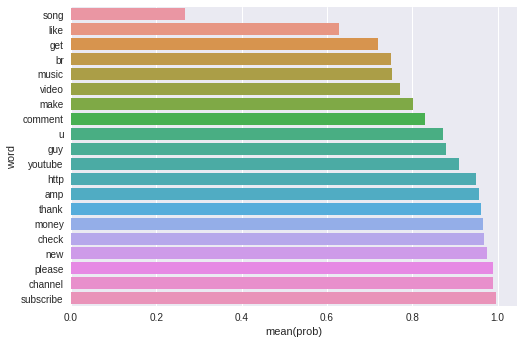

In [25]:

ax = sns.barplot(x="prob", y="word", data=df_spam.sort_values(by=['prob']))


In [26]:
#creat dictionary of all spam words with probability of them being an inductor of a spam 

notspam  =common_words(article_0)

spam  =dict_article(article)

dict_prob = {}


for (w,v) in notspam.items():
  if w not in notspam:
    dict_prob[w] = notspam[w]/(notspam[w])
  else:
    dict_prob[w] = notspam[w]/(spam[w]+notspam[w])

    
data = np.array([['','word','prob','smap','nonsmap']
                ])
                
print(pd.DataFrame(data=data[1:,1:],
                  index=data[1:,0],
                  columns=data[0,1:]))

df_list = []
for k in  sorted(common_words(article_0).keys()):
  df_list.append([k, dict_prob[k], spam[k], notspam[k]] )
 
  print(k, dict_prob[k])
  
print(df_list)

df_notspam = pd.DataFrame(df_list,columns=['word','prob','spam','nonsmap'],dtype=float)
print (df_notspam)

Empty DataFrame
Columns: [word, prob, smap, nonsmap]
Index: []
best 0.7125
billion 0.9629629629629629
br 0.2490272373540856
ever 0.7894736842105263
get 0.2807017543859649
good 0.6575342465753424
katy 0.7
like 0.3726937269372694
love 0.7188940092165899
make 0.19753086419753085
much 0.47619047619047616
music 0.2484076433121019
people 0.38636363636363635
perry 0.7962962962962963
shakira 0.851063829787234
song 0.7315634218289085
video 0.2283464566929134
view 0.746268656716418
watch 0.31313131313131315
year 0.45588235294117646
[['best', 0.7125, 46, 114], ['billion', 0.9629629629629629, 4, 104], ['br', 0.2490272373540856, 386, 128], ['ever', 0.7894736842105263, 16, 60], ['get', 0.2807017543859649, 246, 96], ['good', 0.6575342465753424, 50, 96], ['katy', 0.7, 48, 112], ['like', 0.3726937269372694, 340, 202], ['love', 0.7188940092165899, 122, 312], ['make', 0.19753086419753085, 260, 64], ['much', 0.47619047619047616, 66, 60], ['music', 0.2484076433121019, 236, 78], ['people', 0.386363636363636